# Visualización de Resutlados

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Test Populations
populations = [200, 1000, 10_000, 100_000, 1_000_000, 2_000_000]

# Measured Times (OOP V1 is linear O(N))
poo_v1     = [0.010315, 0.050434, 0.455225, 0.455225*10, 0.455225*100, 0.455225*200]     # O(N)
doo_v2_cpu = [0.000991, 0.001529, 0.006217, 0.068330, 0.646153, 0.646153*2]  
doo_v2_gpu = [0.003168, 0.003166, 0.003379, 0.006899, 0.036990, 0.078876]             # Power GPU

In [78]:
limit_60 = 1/60

def find_x_at_y(x_p, y_p, target_y):
    """Interpola para encontrar el valor de x donde la curva llega a target_y"""
    return np.interp(target_y, y_p, x_p)

# Calculamos los puntos de corte
x_poo = find_x_at_y(populations, poo_v1, limit_60)
x_cpu = find_x_at_y(populations, doo_v2_cpu, limit_60)
x_gpu = find_x_at_y(populations, doo_v2_gpu, limit_60)

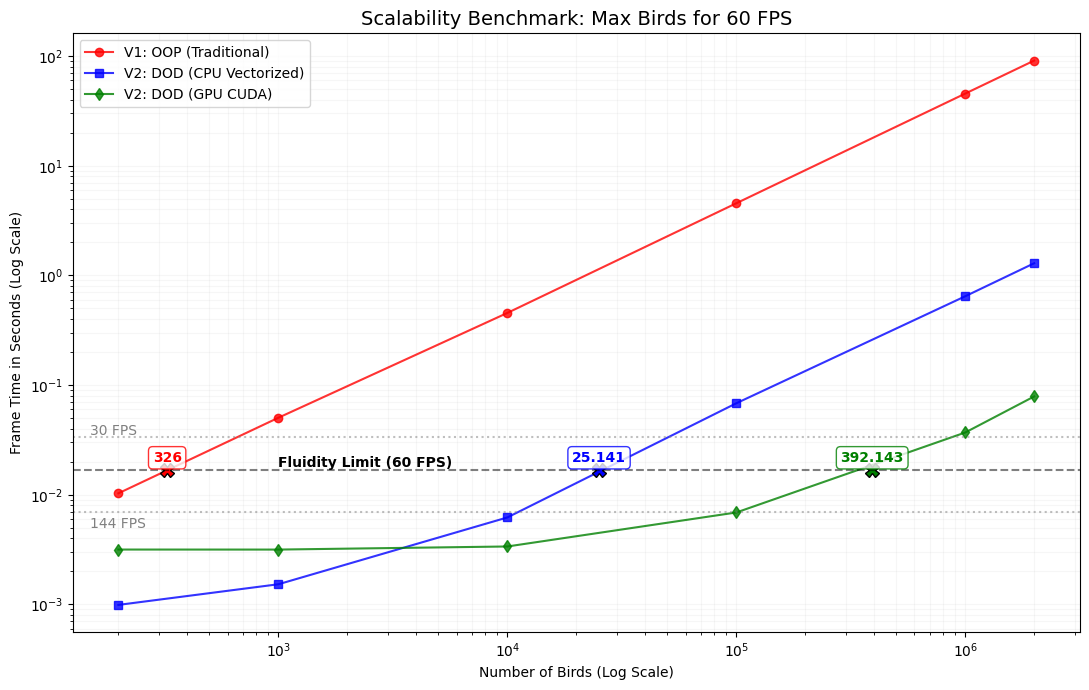

In [79]:
plt.figure(figsize=(11, 7))

# Gráficos de líneas
plt.plot(populations, poo_v1, "r-o", label="V1: OOP (Traditional)", alpha=0.8)
plt.plot(populations, doo_v2_cpu, "b-s", label="V2: DOD (CPU Vectorized)", alpha=0.8)
plt.plot(populations, doo_v2_gpu, "g-d", label="V2: DOD (GPU CUDA)", alpha=0.8)

# Marcadores de intersección (60 FPS)
intersections = [(x_poo, "red"), (x_cpu, "blue"), (x_gpu, "green")]
for x_val, color in intersections:
    plt.plot(x_val, limit_60, marker="X", color=color, markersize=10, markeredgecolor="black")
    formatted_val = f"{int(x_val):,}".replace(",", ".")
    plt.annotate(formatted_val, xy=(x_val, limit_60), xytext=(x_val, limit_60*1.2),
                 color=color, fontweight="bold", ha="center", fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8, ec=color))

# Líneas de Fluidez
plt.axhline(y=1/60, color="black", linestyle="--", alpha=0.5) 
plt.text(1000, 0.018, "Fluidity Limit (60 FPS)", color="black", fontweight='bold')

plt.axhline(y=1/30, color="gray", linestyle=":", alpha=0.5)
plt.text(150, 0.035, "30 FPS", color="gray")

plt.axhline(y=1/144, color="gray", linestyle=":", alpha=0.5)
plt.text(150, 0.005, "144 FPS", color="gray")



# Estética
plt.xscale("log")
plt.yscale("log")
plt.title("Scalability Benchmark: Max Birds for 60 FPS", fontsize=14)
plt.xlabel("Number of Birds (Log Scale)")
plt.ylabel("Frame Time in Seconds (Log Scale)")
plt.legend(loc="upper left")
plt.grid(True, which="both", ls="-", alpha=0.1)

plt.tight_layout()
plt.savefig("architecture_comparison_60fps.png")
plt.show()